In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("/content/Store Sales Dataset.csv")

Exploratory Data Analysis(EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Amount         687 non-null    int64  
 1   Category       687 non-null    object 
 2   Order ID       687 non-null    int64  
 3   Payment Mode   687 non-null    object 
 4   Profit         687 non-null    float64
 5   Quantity       687 non-null    int64  
 6   Customer Name  687 non-null    object 
 7   Sub Category   687 non-null    object 
 8   Order Date     687 non-null    object 
 9   Area           687 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 53.8+ KB


In [4]:
df.shape

(687, 10)

In [5]:
df.head(10)

,Amount,Category,Order ID,Payment Mode,Profit,Quantity,Customer Name,Sub Category,Order Date,Area
0,708,Households,1001,Cash,106.20,8,Hetal Desai,Ironing,2025-01-06,Balewadi
1,421,Households,1002,Cash,63.15,7,Nirali Shah,Ironing,2024-07-26,Sus
2,358,Womens,1003,Card,53.70,15,Aarti Kulkarni,Ironing,2024-06-23,Baner
3,898,Mens,1004,Card,89.80,12,Aarti Kulkarni,Premium Wash,2024-07-28,Balewadi
4,613,Mens,1005,Card,73.56,13,Rajesh Mehta,Laundry,2024-12-28,Balewadi
5,636,Womens,1006,Online Payment,95.40,8,Suresh Jadhav,Ironing,2024-10-03,Mahalunge
6,930,Womens,1007,Card,111.60,3,Nirali Shah,Laundry,2024-07-21,Baner
7,307,Womens,1008,Card,46.05,5,Nirali Shah,Ironing,2025-02-07,Hinjewadi
8,425,Households,1009,Cash,63.75,8,Nilesh Shinde,Ironing,2025-03-03,Mahalunge
9,825,Mens,1010,Cash,123.75,10,Amit Patel,Ironing,2024-12-04,Mahalunge


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

Lable Encoded the categorical columns for easier understanding to the model.

In [7]:
df["Category"] = df["Category"].replace({"Mens": 0, "Womens": 1, "Households": 2})
df["Payment Mode"] = df["Payment Mode"].replace({"Cash": 0, "Card": 1, "Online Payment": 2, "UPI": 3})
df["Sub Category"] = df["Sub Category"].replace({"Ironing": 0, "Premium Wash": 1, "Laundry": 2, "Dry Cleaning": 3})
df["Area"] = df["Area"].replace({"Balewadi": 0, "Sus": 1, "Mahalunge": 2, "Hinjewadi": 3, "Baner": 4})

/tmp/ipython-input-7-3370914979.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Category"] = df["Category"].replace({"Mens": 0, "Womens": 1, "Households": 2})
/tmp/ipython-input-7-3370914979.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Payment Mode"] = df["Payment Mode"].replace({"Cash": 0, "Card": 1, "Online Payment": 2, "UPI": 3})
/tmp/ipython-input-7-3370914979.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly c

In [8]:
df.head(5)

,Amount,Category,Order ID,Payment Mode,Profit,Quantity,Customer Name,Sub Category,Order Date,Area
0,708,2,1001,0,106.20,8,Hetal Desai,0,2025-01-06,0
1,421,2,1002,0,63.15,7,Nirali Shah,0,2024-07-26,1
2,358,1,1003,1,53.70,15,Aarti Kulkarni,0,2024-06-23,4
3,898,0,1004,1,89.80,12,Aarti Kulkarni,1,2024-07-28,0
4,613,0,1005,1,73.56,13,Rajesh Mehta,2,2024-12-28,0


In [9]:
print(df.isnull().sum())

Amount           0
Category         0
Order ID         0
Payment Mode     0
Profit           0
Quantity         0
Customer Name    0
Sub Category     0
Order Date       0
Area             0
dtype: int64


In [10]:
df.head(5)

,Amount,Category,Order ID,Payment Mode,Profit,Quantity,Customer Name,Sub Category,Order Date,Area
0,708,2,1001,0,106.20,8,Hetal Desai,0,2025-01-06,0
1,421,2,1002,0,63.15,7,Nirali Shah,0,2024-07-26,1
2,358,1,1003,1,53.70,15,Aarti Kulkarni,0,2024-06-23,4
3,898,0,1004,1,89.80,12,Aarti Kulkarni,1,2024-07-28,0
4,613,0,1005,1,73.56,13,Rajesh Mehta,2,2024-12-28,0


In [11]:
df.drop(["Customer Name"], axis=1, inplace=True)

This heatmap shows the relationship between each columns with respect to Total Amount. For example Profit is highly related to the Total Amount.

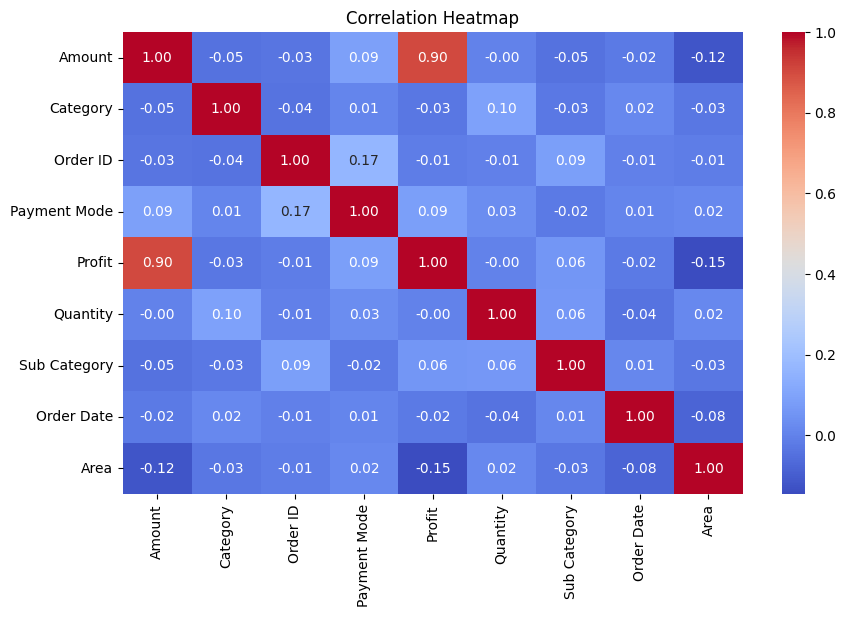

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Here in the Count Plot, in the X-axis, Ironing is represented as 0, Premium Wash as 1, Laundry items as 2 and Dry Cleaning as 3.

/tmp/ipython-input-13-3841719097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Sub Category', palette='Set1')
/tmp/ipython-input-13-3841719097.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub)


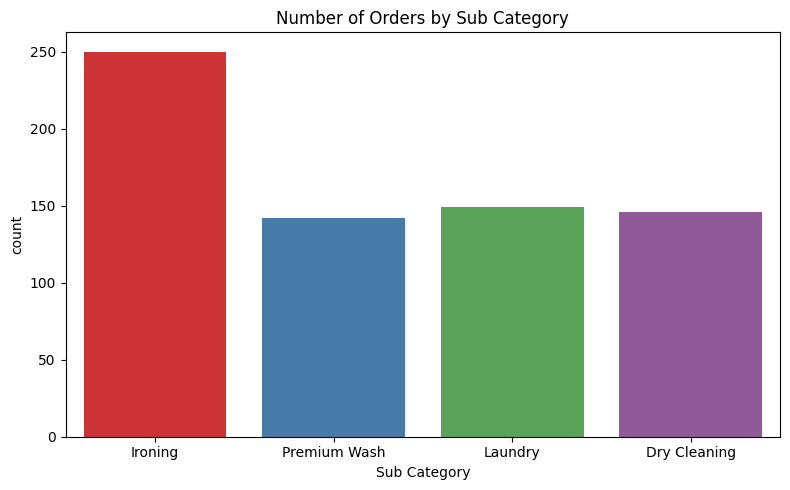

In [13]:
plt.figure(figsize=(8, 5))
sub = ['Ironing', 'Premium Wash', 'Laundry', 'Dry Cleaning']
ax = sns.countplot(data=df, x='Sub Category', palette='Set1')
plt.title("Number of Orders by Sub Category")
ax.set_xticklabels(sub)
plt.tight_layout()
plt.show()

This Countplot shows how many clothes were given for ironing or dry cleaning and which payment method was used for the same.

/tmp/ipython-input-14-2686084793.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(payment)


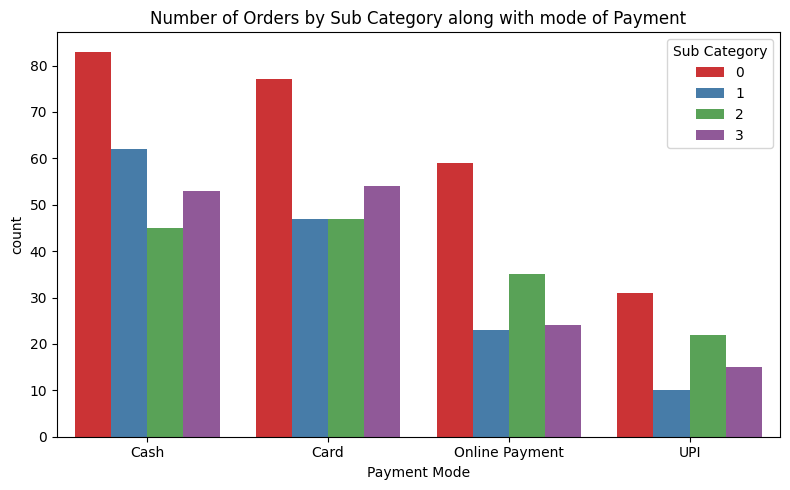

In [14]:
payment = ['Cash', 'Card', 'Online Payment', 'UPI']

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="Payment Mode", hue='Sub Category', palette='Set1')
plt.title("Number of Orders by Sub Category along with mode of Payment")
ax.set_xticklabels(payment)
plt.tight_layout()
plt.show()

This are the histograms of all the numeric values in the dataset.

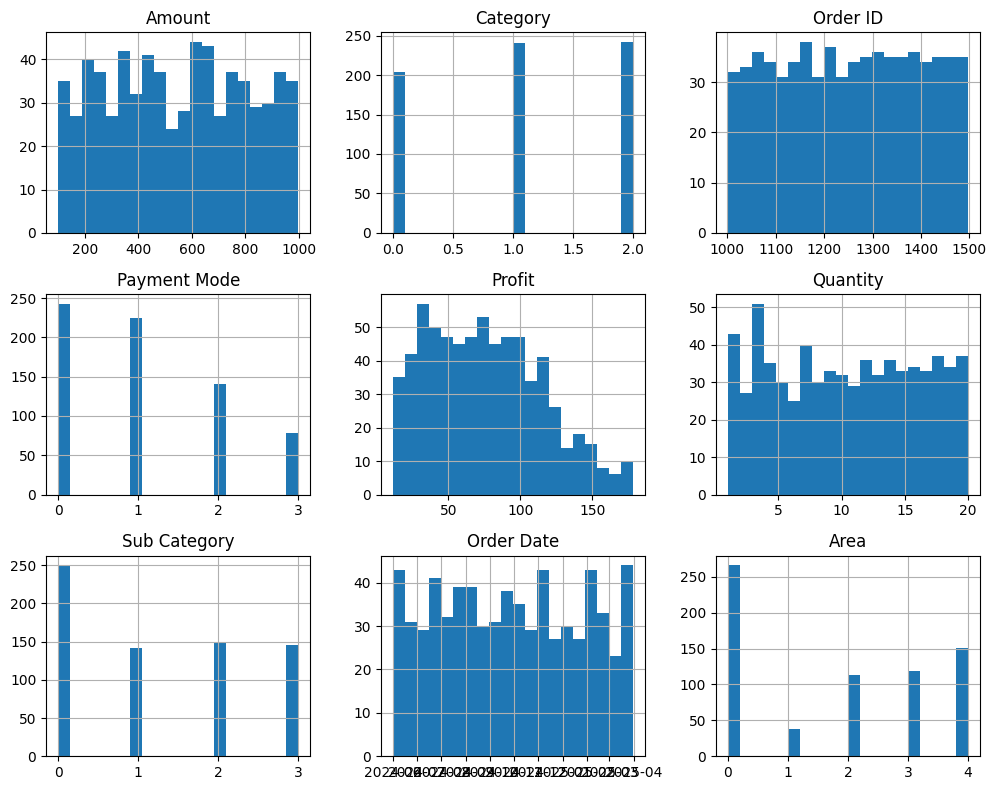

In [15]:
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

This histplot shows the frequency with which the amount was paid for the quantity of laundry.

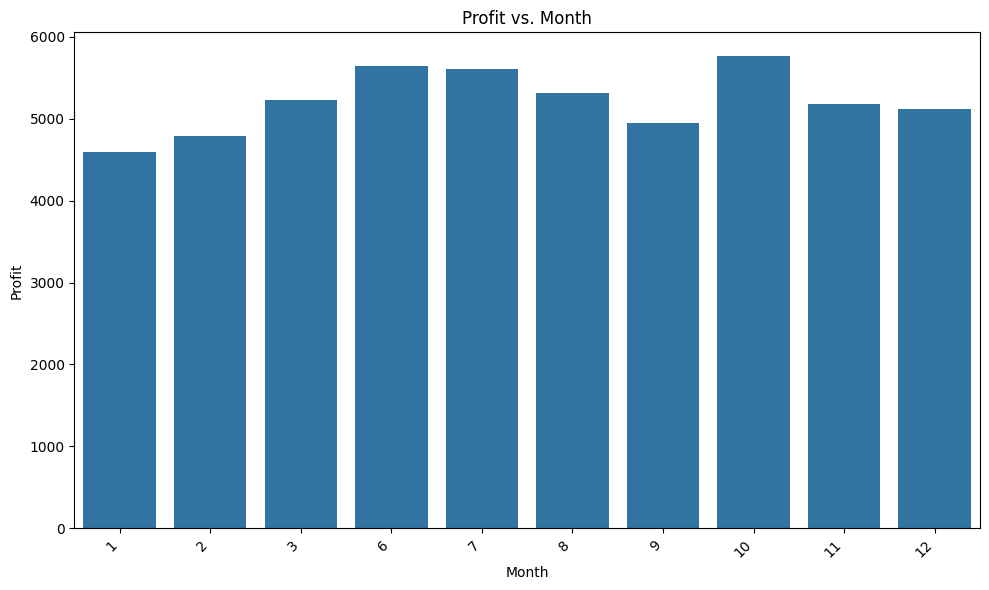

In [16]:
monthly_profit = df.groupby(df['Order Date'].dt.month)['Profit'].sum().reset_index()

# Create the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Date', y='Profit', data=monthly_profit)
plt.title('Profit vs. Month')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

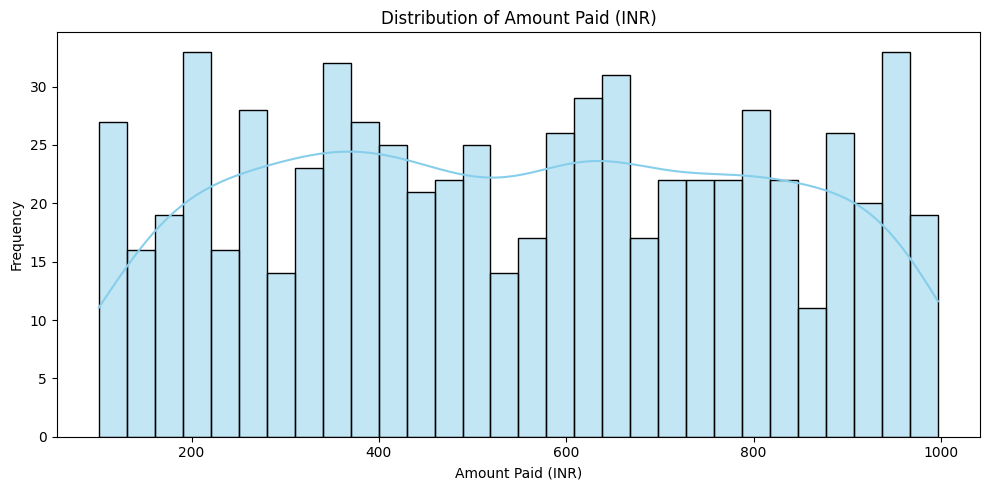

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Amount"],  bins=30, kde=True, color='skyblue')
plt.title("Distribution of Amount Paid (INR)")
plt.xlabel("Amount Paid (INR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

ScatterPlot is needed to show the relationship between the 3 columns( Quantity of Items,Total Amount and Sub Category(Iron/Dry Clean, etc)).

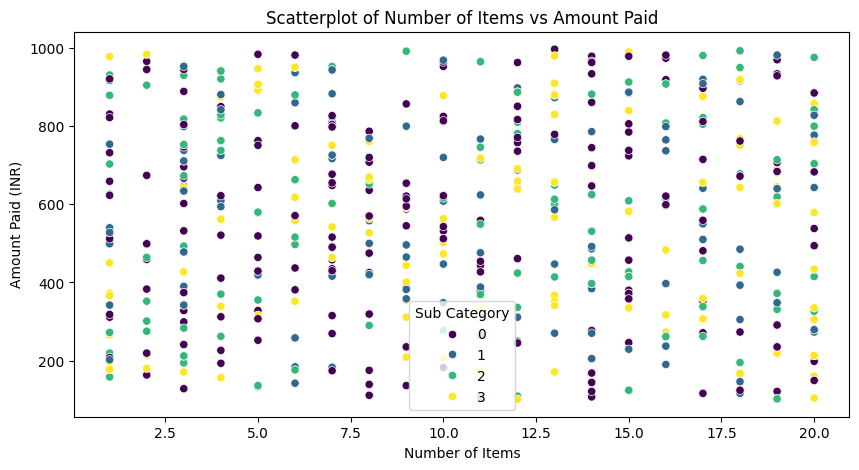

In [18]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Quantity"], y=df["Amount"], hue=df["Sub Category"], palette="viridis")
plt.title("Scatterplot of Number of Items vs Amount Paid")
plt.xlabel("Number of Items")
plt.ylabel("Amount Paid (INR)")
plt.show()

This Pie chart represent what Total Amount was received from customers of different areas(Balewadi: 0, Sus:1, Mahalunge:2, Hinjewadi:3, Baner:4)

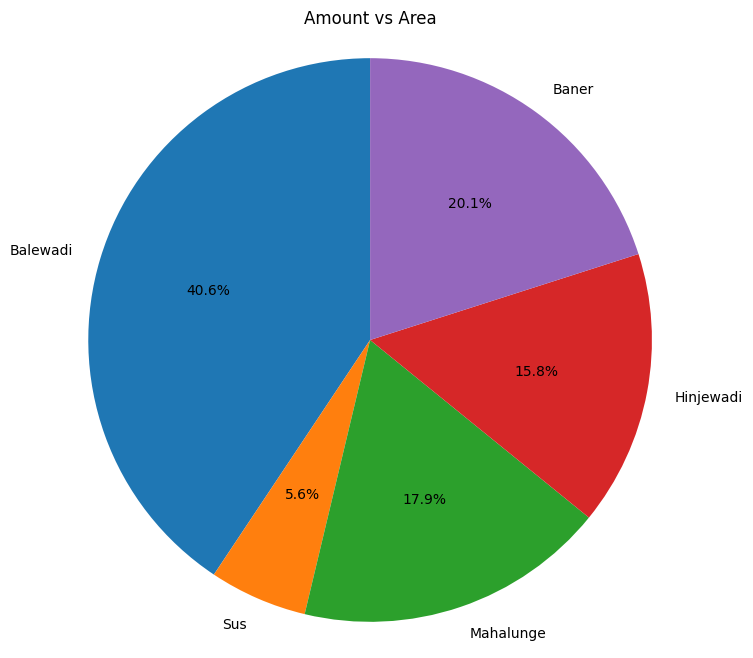

In [19]:
area_names = ['Balewadi', 'Sus', 'Mahalunge', 'Hinjewadi', 'Baner']
area_amount = df.groupby('Area')['Amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(area_amount, labels=area_names, autopct='%1.1f%%', startangle=90)
plt.title('Amount vs Area')
plt.axis('equal')
plt.show()

TRAINING MODELS

In [20]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day
df['Order_Weekday'] = df['Order Date'].dt.weekday

In [21]:
# Assuming you've already encoded these columns numerically
features = ['Amount', 'Quantity', 'Category', 'Payment Mode', 'Sub Category', 'Area',
            'Order_Year', 'Order_Month', 'Order_Day', 'Order_Weekday']
target = 'Profit'

In [22]:
X = df[features]
y = df[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

REGRESSION MODELS

Random Forest Regressor

In [24]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")

R² Score: 0.9985


Linear Regression

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression R² Score: {r2_lr:.4f}")

Linear Regression R² Score: 0.8148


Decision Tree Regressor

In [26]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")

R² Score: 0.9978


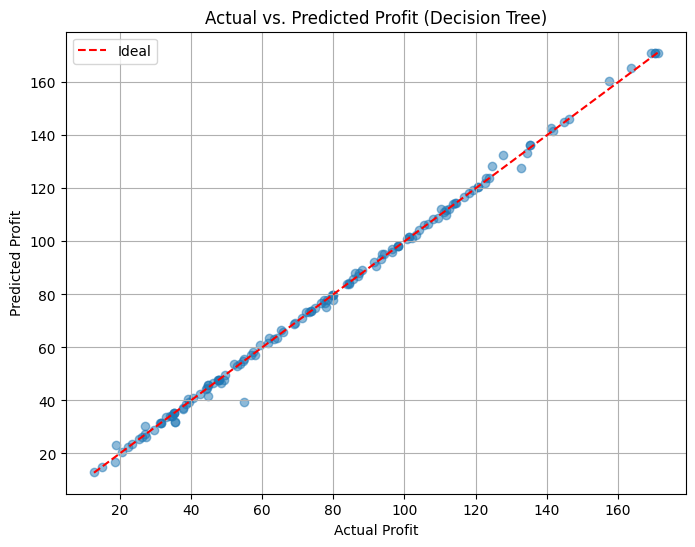

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5) # Alpha means transperancy. How transparent i want the points.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs. Predicted Profit (Decision Tree)")
plt.legend()
plt.grid(True)
plt.show()

Example to predict profit on 2nd May 2025.

In [28]:
future_date = pd.to_datetime("2025-05-02")

# Keep the features in the way they were defined above.

future_input = {
    "Amount": 600,
    "Quantity": 21,
    "Category": 0,
    "Payment Mode": 1,
    "Sub Category": 1,
    "Area": 2,
    "Order_Year": future_date.year,
    "Order_Month": future_date.month,
    "Order_Day": future_date.day,
    "Order_Weekday": future_date.weekday()
}

future_df = pd.DataFrame([future_input])

predicted_profit = dt_model.predict(future_df)[0]

print(f"Predicted Profit on {future_date.date()}: ₹{predicted_profit:.2f}")


Predicted Profit on 2025-05-02: ₹60.80


In [ ]:
def predict_total_profit(num_orders):

    total_profit = 0
    future_date = pd.to_datetime(input("Enter the future date (YYYY-MM-DD): "))

    for i in range(num_orders):
        print(f"\nEnter details for order {i + 1}:")
        amount = float(input("Enter the amount: "))
        quantity = int(input("Enter the quantity: "))
        category = int(input("Enter the category (0: Mens, 1: Womens, 2: Households): "))
        payment_mode = int(input("Enter the payment mode (0: Cash, 1: Card, 2: Online Payment, 3: UPI): "))
        sub_category = int(input("Enter the sub-category (0: Ironing, 1: Premium Wash, 2: Laundry, 3: Dry Cleaning): "))
        area = int(input("Enter the area (0: Balewadi, 1: Sus, 2: Mahalunge, 3: Hinjewadi, 4: Baner): "))

        future_input = {
            "Amount": amount,
            "Quantity": quantity,
            "Category": category,
            "Payment Mode": payment_mode,
            "Sub Category": sub_category,
            "Area": area,
            "Order_Year": future_date.year,
            "Order_Month": future_date.month,
            "Order_Day": future_date.day,
            "Order_Weekday": future_date.weekday()
        }

        future_df = pd.DataFrame([future_input])
        predicted_profit = dt_model.predict(future_df)[0]
        total_profit += predicted_profit

    return total_profit

num_orders = int(input("Enter the number of orders: "))

total_predicted_profit = predict_total_profit(num_orders)
print(f"\nTotal Predicted Profit for {num_orders} orders on {future_date.date()}: ₹{total_predicted_profit:.2f}")

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_model, 'Prediction_model.pkl')

CLASSIFICATION MODELS

In [ ]:
X = df[["Amount", "Profit", "Quantity", "Payment Mode", "Area"]]
y = df["Sub Category"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classifier

In [ ]:
rf_sub = RandomForestClassifier()
rf_sub.fit(X_train, y_train)
yp_rf_sub = rf_sub.predict(X_test)
print("Random Forest Accuracy of Sub-Category:", accuracy_score(y_test, yp_rf_sub))

KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy of Sub-Category:", accuracy_score(y_test, y_pred_knn))

In [ ]:
import pandas as pd


future_input = {
    "Amount": 600,
    "Profit": 58,
    "Quantity": 4,
    "Payment Mode": 1,
    "Area": 2
}

future_df = pd.DataFrame([future_input])

predicted_sub_category = rf_sub.predict(future_df)[0]

print(f"Predicted Sub Category for the given future order: {predicted_sub_category}")
